# 1. Imports 

In [219]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# constants
#path = 'C:/Users/monte/Documents/Memoria/src'
path = 'C:/Users/asus/Documents/2023_2/Memoria/src'

# Ostar
O_df = pd.read_csv(path+'/Data/o_spectral_lines_trim.csv')
# Bstar
B_df = pd.read_csv(path+'/Data/b_spectral_lines_trim.csv')
# Observed spectra
Obs_df = pd.read_csv(path+'/Data/observed_spectral_lines_trim.csv')

# 2. Data

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

target = ['temperature','g','v']


X = B_df.drop(target,axis = 1)
Y = B_df[target]
X_obs = Obs_df.drop(target,axis=1)
Y_obs = Obs_df[target]


y_scaler = MinMaxScaler()
x_scaler = MinMaxScaler()

x_train, x_val, y_train, y_val = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.75, test_size=0.25, random_state=42)

#x_train = np.random.normal(loc=0, scale=0.01, size=x_train.shape) + x_train

y_scaler = y_scaler.fit(y_train)
y_train = y_scaler.transform(y_train)
y_val = y_scaler.transform(y_val)
y_test = y_scaler.transform(y_test)
y_obs = y_scaler.transform(Y_obs.values)

# Datos sin escalar
# x_scaler = x_scaler.fit(x_train)
# x_train = x_scaler.transform(x_train)
# x_val = x_scaler.transform(x_val)
# x_test = x_scaler.transform(x_test)
# x_obs = x_scaler.transform(X_obs.values)



c:\Users\Asus\Documents\2023_2\Memoria\py310_tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# 3. NN Training with unscaled data

In [221]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 

#input_shape = (4, 10, 128) = (batch_size, steps, vectorLength) = (batchsize, rotaciones, frecuencias)

#normalize = layers.Normalization()

# This layer will shift and scale inputs into a distribution centered around 0 with standard deviation 1.
# It accomplishes this by precomputing the mean and variance of the data and calling (input - mean) / sqrt(var) at runtime

# TODO: Probar con los datos sin normalizar
#normalize.adapt(x_train)

input_shape = (x_train.shape[1],1)

def generate_model(): 
  return tf.keras.Sequential([
  keras.Input(shape=(input_shape)),
  #normalize,
  layers.Conv1D(32,padding="same",kernel_size=3, activation='relu'),
  layers.Conv1D(32,padding="same",kernel_size=3, activation='relu'),
  layers.MaxPooling1D(pool_size=3, padding='same'),
  layers.Conv1D(64,padding="same",kernel_size=2, activation='relu'),
  layers.Conv1D(64,padding="same",kernel_size=2, activation='relu'),
  layers.MaxPooling1D(pool_size=2, padding='same'),
  layers.Conv1D(128,padding="same",kernel_size=2, activation='relu'),
  layers.Conv1D(128,padding="same",kernel_size=2, activation='relu'),
  layers.MaxPooling1D(pool_size=2, padding='same'),
  layers.GlobalAveragePooling1D(),
  
  layers.Dense(64, activation='relu'),
  layers.Dense(3, activation='linear')
])

In [222]:
model = generate_model()
model = tf.keras.Model(inputs=model.input, outputs=model.output) 
model.summary()

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 139, 1)]          0         
                                                                 
 conv1d_205 (Conv1D)         (None, 139, 32)           128       
                                                                 
 conv1d_206 (Conv1D)         (None, 139, 32)           3104      
                                                                 
 max_pooling1d_89 (MaxPoolin  (None, 47, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_207 (Conv1D)         (None, 47, 64)            4160      
                                                                 
 conv1d_208 (Conv1D)         (None, 47, 64)            8256      
                                                          

In [223]:
model.compile(loss = ['MSE'],
                           optimizer = tf.optimizers.Adam(),
                           metrics=['MAE'])

# model.compile(loss='MAE',optimizer=optimizer,metrics=['MSE'])
#history = simple_model.fit(x=x_train, y=y_train, validation_data=(x_val,y_val), epochs=20)

history = model.fit(x=x_train, y=y_train,validation_data=(x_val,y_val), epochs=20)

Epoch 1/20
459/459 [==============================] - 4s 7ms/step - loss: 0.0878 - MAE: 0.2527 - val_loss: 0.0834 - val_MAE: 0.2480
Epoch 2/20
459/459 [==============================] - 3s 6ms/step - loss: 0.0829 - MAE: 0.2469 - val_loss: 0.0832 - val_MAE: 0.2476
Epoch 3/20
459/459 [==============================] - 3s 6ms/step - loss: 0.0817 - MAE: 0.2449 - val_loss: 0.0786 - val_MAE: 0.2399
Epoch 4/20
459/459 [==============================] - 3s 6ms/step - loss: 0.0529 - MAE: 0.1792 - val_loss: 0.0384 - val_MAE: 0.1463
Epoch 5/20
459/459 [==============================] - 3s 6ms/step - loss: 0.0368 - MAE: 0.1375 - val_loss: 0.0349 - val_MAE: 0.1321
Epoch 6/20
459/459 [==============================] - 3s 6ms/step - loss: 0.0352 - MAE: 0.1316 - val_loss: 0.0337 - val_MAE: 0.1269
Epoch 7/20
459/459 [==============================] - 3s 6ms/step - loss: 0.0334 - MAE: 0.1274 - val_loss: 0.0344 - val_MAE: 0.1361
Epoch 8/20
459/459 [==============================] - 3s 6ms/step - loss: 0.

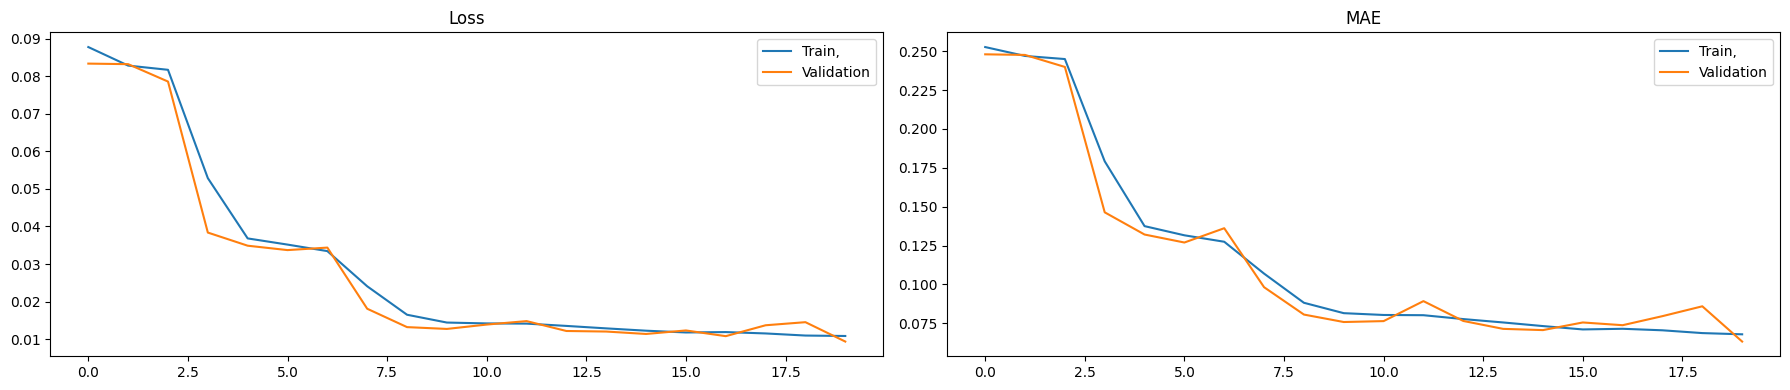

In [224]:
fig, axis = plt.subplots(1, 2, figsize=(18,4))
# trendlines
axis[0].plot(history.history['loss'], label='train t_out_loss')
axis[1].plot(history.history['MAE'], label='val  t_out_loss')
axis[0].plot(history.history['val_loss'], label='train t_out_accuracy')
axis[1].plot(history.history['val_MAE'], label='val t_out_accuracy')

# titles
axis[0].set_title("Loss")
axis[1].set_title("MAE")

# legends
axis[0].legend(['Train,','Validation'])
axis[1].legend(['Train,','Validation'])

plt.tight_layout()
plt.show()

In [225]:
predictions = y_scaler.inverse_transform(model.predict(x_test))

153/153 [==============================] - 0s 2ms/step


In [226]:
# https://kdepy.readthedocs.io/en/latest/examples.html#minimal-working-example-with-options
from KDEpy import FFTKDE
from sklearn.neighbors import KernelDensity
import numpy as np

def SKL_density_plot(data, ax,title='',low_bound=None,up_bound=None, color='black',alpha=1,label='',kernel='gaussian', bw='silverman',linewidth=1):
  
	if low_bound != None and up_bound != None:
		bw = FFTKDE(bw=bw, kernel='gaussian').fit(data.reshape(-1,1)).bw
		kde = KernelDensity(bandwidth=bw, kernel=kernel).fit(data.reshape(-1,1))
		data = np.concatenate((data, 2 * low_bound - data, 2 * up_bound - data))
		kde = KernelDensity(bandwidth=kde.bandwidth_, kernel=kernel).fit(data.reshape(-1,1))
		x = np.linspace(low_bound,up_bound,1000)
		y = np.exp(kde.score_samples(x.reshape(-1,1)))
		plot_y = y[np.where((x>=low_bound) & (x<=up_bound))] # Set the KDE to zero outside of the domain
		plot_x = x[np.where((x>=low_bound) & (x<=up_bound))]  # Set the KDE to zero outside of the domain
		plot_y = np.append(plot_y,[0]) # Set the KDE to zero outside of the domain
		plot_x = np.append(plot_x,[up_bound])  # Set the KDE to zero outside of the domain
		plot_y = np.insert(plot_y,[0],[0]) # Set the KDE to zero outside of the domain
		plot_x = np.insert(plot_x,[0],[low_bound])  # Set the KDE to zero outside of the domain
		plot_y = plot_y * 3  # Double the y-values to get integral of ~1
		ax.plot(plot_x, plot_y, label=label,color=color,alpha=alpha,linewidth=linewidth)
		return x, y, kde
	else:
		kde = KernelDensity(bandwidth=bw, kernel=kernel).fit(data.reshape(-1,1))
		x=np.linspace(data.min(),data.max(),1000)
		y = np.exp(kde.score_samples(x.reshape(-1,1)))
		ax.plot(x, y, label=label,color=color,alpha=alpha)
		return x, y, kde


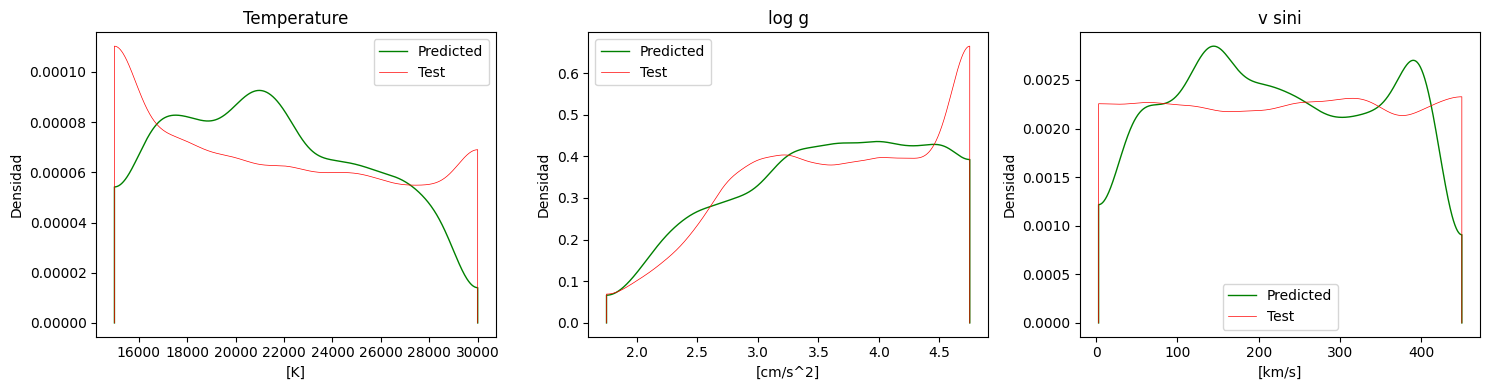

In [227]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

for i, featureName in enumerate(target):
	SKL_density_plot(predictions[:,i], axes[i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'green',label='Predicted')
	SKL_density_plot(y_scaler.inverse_transform(y_test)[:,i], axes[i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color='red',linewidth=0.5,label='Test')
	axes[i].set_title(target[i])
	measure = ['Temperature','log g', 'v sini']
	measure_unit = ['[K]', '[cm/s^2]', '[km/s]']
	axes[i].set_xlabel(measure_unit[i])
	axes[i].set_ylabel('Densidad')
	axes[i].set_title(measure[i])
	axes[i].legend()

plt.legend()
plt.tight_layout();
plt.show()

In [228]:
predictions = y_scaler.inverse_transform(model.predict(X_obs))
results = Y_obs.join(pd.DataFrame(predictions, columns = ['pred_temperature','pred_g','pred_v']))
results

1/1 [==============================] - 0s 18ms/step


,temperature,g,v,pred_temperature,pred_g,pred_v
0,15000.0,3.40,68.0,16191.805664,3.437793,115.667015
1,18400.0,3.50,40.0,16585.011719,4.167542,100.617737
2,30000.0,3.53,150.0,19419.853516,2.881399,133.181732
3,22000.0,3.90,280.0,18377.765625,3.947221,291.629547
4,24500.0,3.40,215.0,22392.984375,3.520190,207.067932
5,22000.0,3.50,180.0,17927.267578,3.574131,212.386063
6,20000.0,3.56,10.0,21072.130859,3.534923,66.672142
7,18000.0,3.53,250.0,21037.880859,3.521488,228.568451
8,26000.0,2.90,300.0,24126.919922,2.457269,272.335632


# 4. Unscaled data and noise addition

In [229]:
aux = x_train 

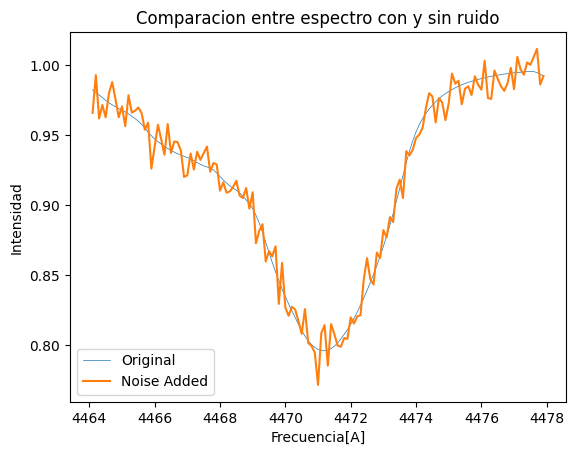

In [230]:

x_train = np.random.normal(loc=0, scale=0.01, size=x_train.shape) + aux
plt.plot(np.vectorize(float)(x_train.columns),aux.iloc[0],label='Original', linewidth=0.5)
plt.plot(np.vectorize(float)(x_train.columns),x_train.iloc[0],label='Noise Added')
plt.title('Comparacion entre espectro con y sin ruido')
plt.xlabel('Frecuencia[A]'); plt.ylabel('Intensidad')
plt.legend()
plt.show()

In [231]:
model = generate_model()
model = tf.keras.Model(inputs=model.input, outputs=model.output) 

model.compile(loss = ['MSE'],
                           optimizer = tf.optimizers.Adam(),
                           metrics=['MAE'])

# model.compile(loss='MAE',optimizer=optimizer,metrics=['MSE'])
#history = simple_model.fit(x=x_train, y=y_train, validation_data=(x_val,y_val), epochs=20)

history = model.fit(x=x_train, y=y_train,validation_data=(x_val,y_val), epochs=20)

Epoch 1/20
459/459 [==============================] - 4s 7ms/step - loss: 0.0885 - MAE: 0.2533 - val_loss: 0.0828 - val_MAE: 0.2475
Epoch 2/20
459/459 [==============================] - 3s 6ms/step - loss: 0.0825 - MAE: 0.2465 - val_loss: 0.0825 - val_MAE: 0.2468
Epoch 3/20
459/459 [==============================] - 3s 6ms/step - loss: 0.0811 - MAE: 0.2437 - val_loss: 0.0763 - val_MAE: 0.2349
Epoch 4/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0501 - MAE: 0.1722 - val_loss: 0.0416 - val_MAE: 0.1600
Epoch 5/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0362 - MAE: 0.1346 - val_loss: 0.0374 - val_MAE: 0.1421
Epoch 6/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0359 - MAE: 0.1337 - val_loss: 0.0350 - val_MAE: 0.1327
Epoch 7/20
459/459 [==============================] - 3s 6ms/step - loss: 0.0349 - MAE: 0.1306 - val_loss: 0.0345 - val_MAE: 0.1260
Epoch 8/20
459/459 [==============================] - 3s 6ms/step - loss: 0.

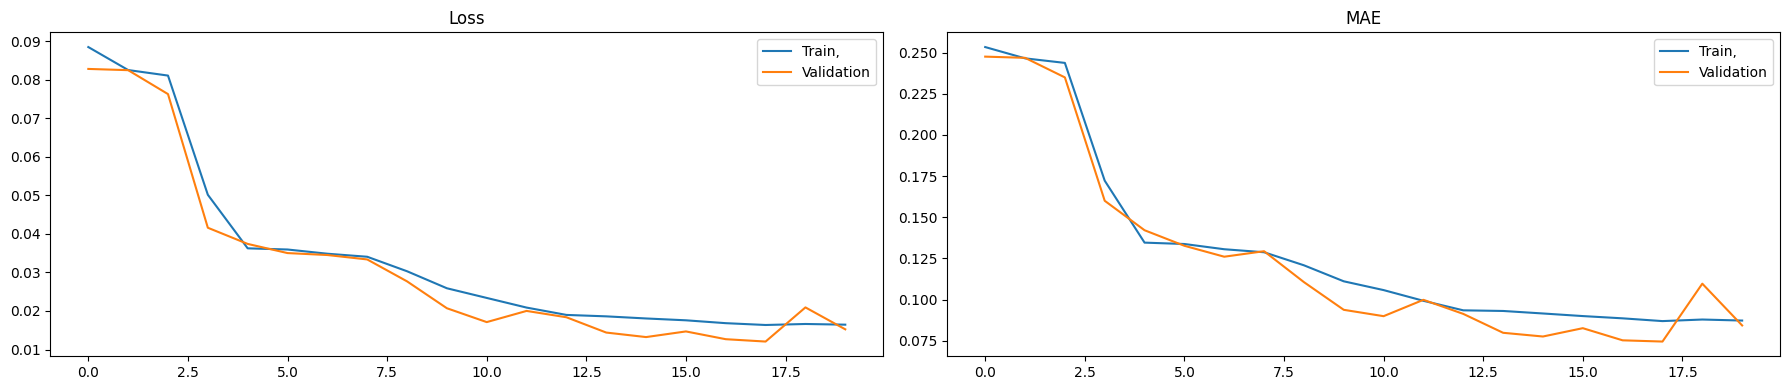

In [232]:
fig, axis = plt.subplots(1, 2, figsize=(18,4))
# trendlines
axis[0].plot(history.history['loss'], label='train t_out_loss')
axis[1].plot(history.history['MAE'], label='val  t_out_loss')
axis[0].plot(history.history['val_loss'], label='train t_out_accuracy')
axis[1].plot(history.history['val_MAE'], label='val t_out_accuracy')

# titles
axis[0].set_title("Loss")
axis[1].set_title("MAE")

# legends
axis[0].legend(['Train,','Validation'])
axis[1].legend(['Train,','Validation'])

plt.tight_layout()
plt.show()

In [233]:
predictions = y_scaler.inverse_transform(model.predict(x_test))

153/153 [==============================] - 0s 2ms/step


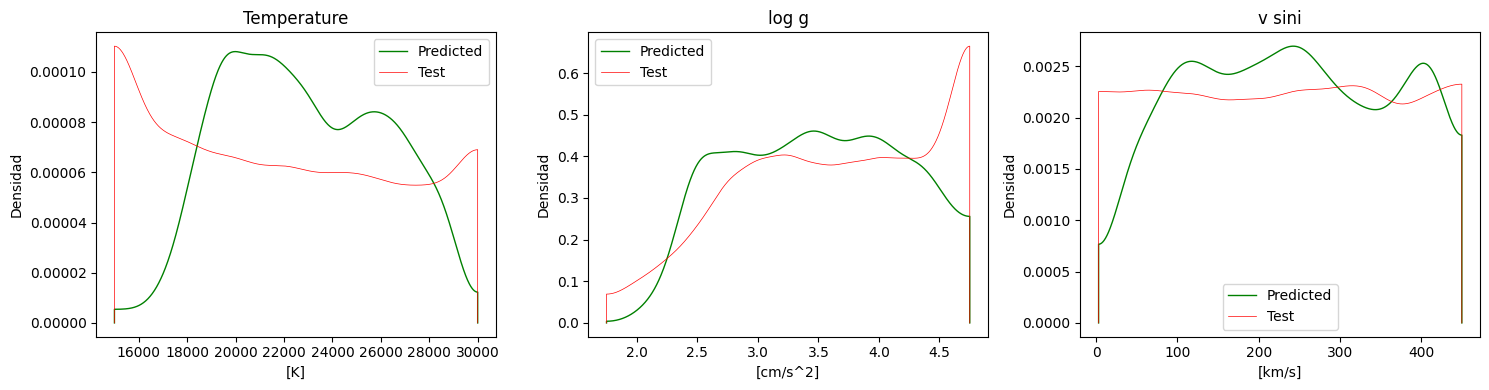

In [234]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

for i, featureName in enumerate(target):
	SKL_density_plot(predictions[:,i], axes[i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'green',label='Predicted')
	SKL_density_plot(y_scaler.inverse_transform(y_test)[:,i], axes[i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color='red',linewidth=0.5,label='Test')
	axes[i].set_title(target[i])
	measure = ['Temperature','log g', 'v sini']
	measure_unit = ['[K]', '[cm/s^2]', '[km/s]']
	axes[i].set_xlabel(measure_unit[i])
	axes[i].set_ylabel('Densidad')
	axes[i].set_title(measure[i])
	axes[i].legend()

plt.legend()
plt.tight_layout();
plt.show()

In [235]:
predictions = y_scaler.inverse_transform(model.predict(X_obs))
results = Y_obs.join(pd.DataFrame(predictions, columns = ['pred_temperature','pred_g','pred_v']))
results

1/1 [==============================] - 0s 17ms/step


,temperature,g,v,pred_temperature,pred_g,pred_v
0,15000.0,3.40,68.0,21917.216797,2.695395,151.619003
1,18400.0,3.50,40.0,20091.314453,4.004071,121.197929
2,30000.0,3.53,150.0,20768.714844,2.876579,150.728485
3,22000.0,3.90,280.0,23617.869141,3.761392,296.285828
4,24500.0,3.40,215.0,24334.781250,3.480967,215.703903
5,22000.0,3.50,180.0,23834.054688,3.355393,222.621109
6,20000.0,3.56,10.0,23232.662109,3.388626,66.927048
7,18000.0,3.53,250.0,24156.486328,3.582525,223.774719
8,26000.0,2.90,300.0,25489.156250,2.423499,307.121521


# 4. Training with scaled data

In [236]:
x_scaler = x_scaler.fit(aux)
x_train = x_scaler.transform(aux)
x_val = x_scaler.transform(x_val)
x_test = x_scaler.transform(x_test)
x_obs = x_scaler.transform(X_obs.values)

c:\Users\Asus\Documents\2023_2\Memoria\py310_tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [237]:
model = generate_model()
model = tf.keras.Model(inputs=model.input, outputs=model.output) 

model.compile(loss = ['MSE'],
                           optimizer = tf.optimizers.Adam(),
                           metrics=['MAE'])

# model.compile(loss='MAE',optimizer=optimizer,metrics=['MSE'])
#history = simple_model.fit(x=x_train, y=y_train, validation_data=(x_val,y_val), epochs=20)

history = model.fit(x=x_train, y=y_train,validation_data=(x_val,y_val), epochs=20)

Epoch 1/20


459/459 [==============================] - 5s 9ms/step - loss: 0.0538 - MAE: 0.1784 - val_loss: 0.0292 - val_MAE: 0.1281
Epoch 2/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0193 - MAE: 0.1002 - val_loss: 0.0148 - val_MAE: 0.0849
Epoch 3/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0144 - MAE: 0.0854 - val_loss: 0.0124 - val_MAE: 0.0820
Epoch 4/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0118 - MAE: 0.0760 - val_loss: 0.0106 - val_MAE: 0.0751
Epoch 5/20
459/459 [==============================] - 3s 6ms/step - loss: 0.0091 - MAE: 0.0663 - val_loss: 0.0064 - val_MAE: 0.0550
Epoch 6/20
459/459 [==============================] - 3s 6ms/step - loss: 0.0067 - MAE: 0.0565 - val_loss: 0.0053 - val_MAE: 0.0498
Epoch 7/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0058 - MAE: 0.0523 - val_loss: 0.0054 - val_MAE: 0.0524
Epoch 8/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0045 - MAE:

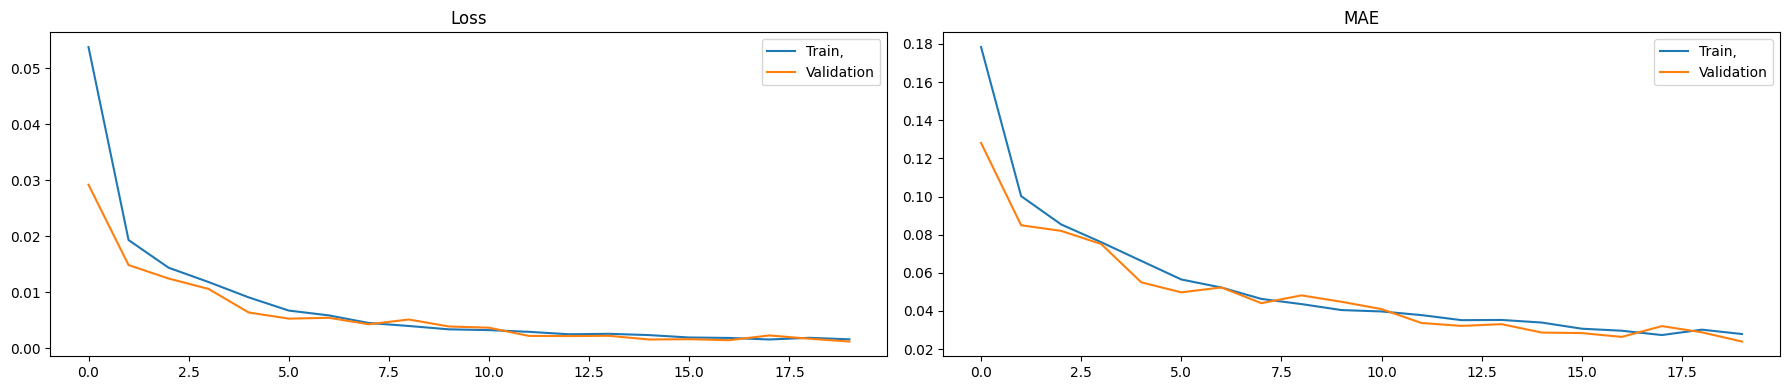

In [238]:
fig, axis = plt.subplots(1, 2, figsize=(18,4))
# trendlines
axis[0].plot(history.history['loss'], label='train t_out_loss')
axis[1].plot(history.history['MAE'], label='val  t_out_loss')
axis[0].plot(history.history['val_loss'], label='train t_out_accuracy')
axis[1].plot(history.history['val_MAE'], label='val t_out_accuracy')

# titles
axis[0].set_title("Loss")
axis[1].set_title("MAE")

# legends
axis[0].legend(['Train,','Validation'])
axis[1].legend(['Train,','Validation'])

plt.tight_layout()
plt.show()

In [239]:
predictions = y_scaler.inverse_transform(model.predict(x_test))

153/153 [==============================] - 0s 2ms/step


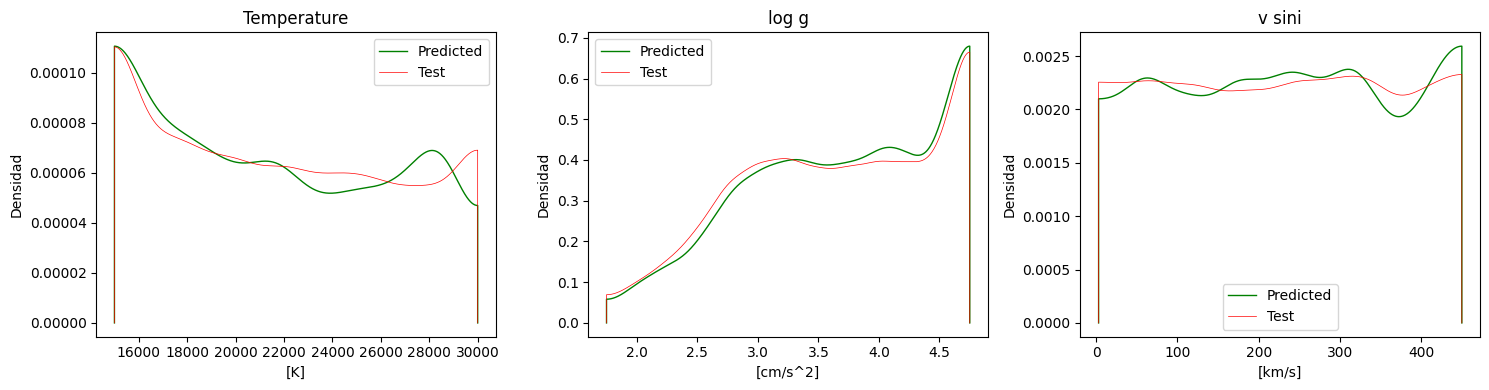

In [240]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

for i, featureName in enumerate(target):
	SKL_density_plot(predictions[:,i], axes[i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'green',label='Predicted')
	SKL_density_plot(y_scaler.inverse_transform(y_test)[:,i], axes[i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color='red',linewidth=0.5,label='Test')
	axes[i].set_title(target[i])
	measure = ['Temperature','log g', 'v sini']
	measure_unit = ['[K]', '[cm/s^2]', '[km/s]']
	axes[i].set_xlabel(measure_unit[i])
	axes[i].set_ylabel('Densidad')
	axes[i].set_title(measure[i])
	axes[i].legend()

plt.legend()
plt.tight_layout();
plt.show()

In [241]:
predictions = y_scaler.inverse_transform(model.predict(X_obs))
results = Y_obs.join(pd.DataFrame(predictions, columns = ['pred_temperature','pred_g','pred_v']))
results

1/1 [==============================] - 0s 92ms/step


,temperature,g,v,pred_temperature,pred_g,pred_v
0,15000.0,3.40,68.0,14108.461914,2.072277,107.564423
1,18400.0,3.50,40.0,23121.603516,2.545008,162.741226
2,30000.0,3.53,150.0,18147.630859,2.156433,122.387291
3,22000.0,3.90,280.0,16985.300781,2.438537,140.567932
4,24500.0,3.40,215.0,17589.917969,2.435303,131.362961
5,22000.0,3.50,180.0,20482.511719,2.466369,130.060516
6,20000.0,3.56,10.0,20125.310547,2.297055,141.153259
7,18000.0,3.53,250.0,20532.671875,2.550511,137.101532
8,26000.0,2.90,300.0,9725.149414,2.537119,9.581056


# 5. Scaled Data and Noise addition

In [242]:
x_train = np.random.normal(loc=0, scale=0.001, size=aux.shape) + aux

x_scaler = x_scaler.fit(x_train)
x_train = x_scaler.transform(x_train)
x_val = x_scaler.transform(x_val)
x_test = x_scaler.transform(x_test)
x_obs = x_scaler.transform(X_obs.values)

c:\Users\Asus\Documents\2023_2\Memoria\py310_tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Asus\Documents\2023_2\Memoria\py310_tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Asus\Documents\2023_2\Memoria\py310_tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [243]:
model = generate_model()
model = tf.keras.Model(inputs=model.input, outputs=model.output) 

model.compile(loss = ['MSE'],
                           optimizer = tf.optimizers.Adam(),
                           metrics=['MAE'])

# model.compile(loss='MAE',optimizer=optimizer,metrics=['MSE'])
#history = simple_model.fit(x=x_train, y=y_train, validation_data=(x_val,y_val), epochs=20)

history = model.fit(x=x_train, y=y_train,validation_data=(x_val,y_val), epochs=20)

Epoch 1/20
459/459 [==============================] - 4s 7ms/step - loss: 0.0574 - MAE: 0.1820 - val_loss: 0.7615 - val_MAE: 0.7846
Epoch 2/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0222 - MAE: 0.1078 - val_loss: 15.7105 - val_MAE: 2.7730
Epoch 3/20
459/459 [==============================] - 3s 7ms/step - loss: 0.0149 - MAE: 0.0877 - val_loss: 13.9113 - val_MAE: 2.6734
Epoch 4/20
459/459 [==============================] - 3s 6ms/step - loss: 0.0118 - MAE: 0.0771 - val_loss: 6.5612 - val_MAE: 1.8884
Epoch 5/20
459/459 [==============================] - 3s 6ms/step - loss: 0.0091 - MAE: 0.0675 - val_loss: 3.2613 - val_MAE: 1.4062
Epoch 6/20
459/459 [==============================] - 3s 6ms/step - loss: 0.0068 - MAE: 0.0585 - val_loss: 2.1043 - val_MAE: 1.2616
Epoch 7/20
459/459 [==============================] - 3s 6ms/step - loss: 0.0059 - MAE: 0.0545 - val_loss: 2.6227 - val_MAE: 1.4086
Epoch 8/20
459/459 [==============================] - 3s 6ms/step - loss: 

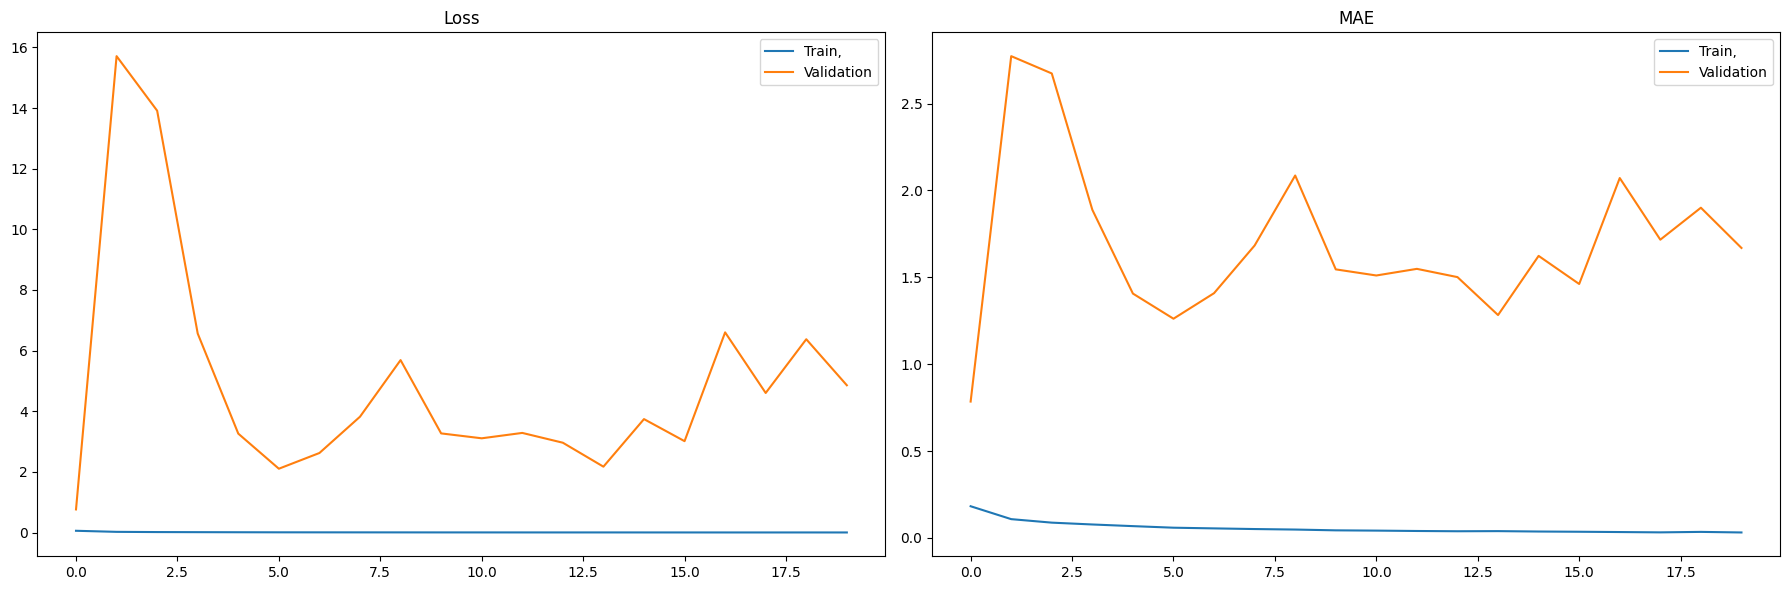

In [244]:
fig, axis = plt.subplots(1, 2, figsize=(18,6))
# trendlines
axis[0].plot(history.history['loss'], label='train t_out_loss')
axis[1].plot(history.history['MAE'], label='val  t_out_loss')
axis[0].plot(history.history['val_loss'], label='train t_out_accuracy')
axis[1].plot(history.history['val_MAE'], label='val t_out_accuracy')

# titles
axis[0].set_title("Loss")
axis[1].set_title("MAE")

# legends
axis[0].legend(['Train,','Validation'])
axis[1].legend(['Train,','Validation'])

plt.tight_layout()
plt.show()

In [245]:
predictions = y_scaler.inverse_transform(model.predict(x_test))

153/153 [==============================] - 0s 2ms/step


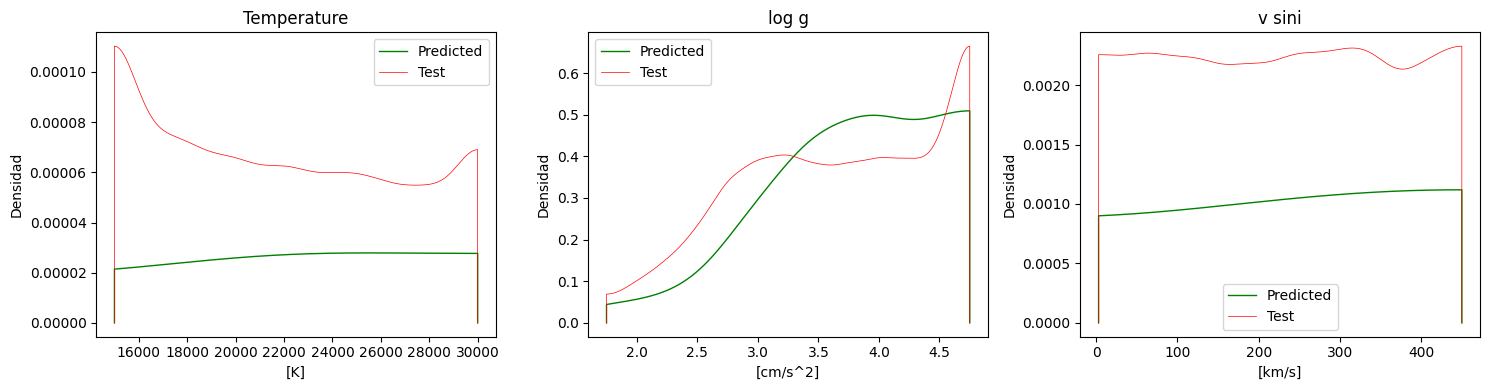

In [246]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

for i, featureName in enumerate(target):
	SKL_density_plot(predictions[:,i], axes[i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color = 'green',label='Predicted')
	SKL_density_plot(y_scaler.inverse_transform(y_test)[:,i], axes[i], featureName, low_bound=Y.iloc[:,i].min(),up_bound=Y.iloc[:,i].max(), color='red',linewidth=0.5,label='Test')
	axes[i].set_title(target[i])
	measure = ['Temperature','log g', 'v sini']
	measure_unit = ['[K]', '[cm/s^2]', '[km/s]']
	axes[i].set_xlabel(measure_unit[i])
	axes[i].set_ylabel('Densidad')
	axes[i].set_title(measure[i])
	axes[i].legend()

plt.legend()
plt.tight_layout();
plt.show()

In [247]:
predictions = y_scaler.inverse_transform(model.predict(X_obs))
results = Y_obs.join(pd.DataFrame(predictions, columns = ['pred_temperature','pred_g','pred_v']))
results

1/1 [==============================] - 0s 107ms/step


,temperature,g,v,pred_temperature,pred_g,pred_v
0,15000.0,3.40,68.0,20285.134766,2.211721,171.160461
1,18400.0,3.50,40.0,26230.158203,2.707724,217.077759
2,30000.0,3.53,150.0,23083.273438,2.392294,191.709061
3,22000.0,3.90,280.0,23523.445312,3.038733,226.074463
4,24500.0,3.40,215.0,23248.154297,2.752357,225.333939
5,22000.0,3.50,180.0,23650.865234,2.618564,217.850296
6,20000.0,3.56,10.0,22863.082031,2.237815,157.892044
7,18000.0,3.53,250.0,23803.593750,2.684741,220.186768
8,26000.0,2.90,300.0,19174.882812,2.256817,126.890678
